<a href="https://colab.research.google.com/github/saurabhIU/Deep-Learning/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
import os
warnings.filterwarnings('ignore')

In [126]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/MNIST_data", one_hot=True)

Extracting /tmp/data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [127]:
X_train, Y_train = mnist.train.images,mnist.train.labels
X_test, Y_test = mnist.test.images, mnist.test.labels
print (f'Total Training Images in Dataset {X_train.shape} , Total training label is {Y_train.shape}')
print (f'Total Test Images in Dataset {X_test.shape} , Total test label is {Y_test.shape}')

Total Training Images in Dataset (55000, 784) , Total training label is (55000, 10)
Total Test Images in Dataset (10000, 784) , Total test label is (10000, 10)


In [0]:
EPOCHS = 400
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
layer_output = tf.placeholder("float", [None, 1024])
BATCH_SIZE = 10000

# Neural Network

In [0]:
def nn_model(data):
  
    layer1 = tf.layers.dense(data, 1024,activation=tf.nn.relu)
    layer2 = tf.layers.dense(layer1, 1024,activation=tf.nn.relu)
    layer3 = tf.layers.dense(layer2, 1024,activation=tf.nn.relu)
    layer4 = tf.layers.dense(layer3, 1024,activation=tf.nn.relu)
    logits = tf.layers.dense(layer4, 10)
    
    return logits,layer1,layer2,layer3,layer4


# Helper Function to get batches for training and test

In [0]:
def get_input_batch(batch_size, data, labels):
    '''
    Return a total of `batch_size` random samples and labels. 
    '''
    index = np.random.choice(data.shape[0], batch_size)
    x = [data[i] for i in (index)]
    y = [labels[i] for i in (index)]
    return np.asarray(x), np.asarray(y)

# Functions to calculate Cost, Optimizer,Prediction

In [0]:
logits,layer1_output,layer2_output,layer3_output,layer4_output = nn_model(X)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=logits)
optimizer = tf.train.AdamOptimizer().minimize(cost)
prediction = tf.nn.softmax(logits)
prediction_of_first_layer = tf.nn.softmax(layer1_output)
prediction_of_second_layer = tf.nn.softmax(layer2_output)
prediction_of_third_layer = tf.nn.softmax(layer3_output)
prediction_of_last_layer = tf.nn.softmax(layer4_output)
correct_prediction = tf.equal(tf.argmax(prediction, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [132]:
sess =  tf.Session() 
    
sess.run(tf.global_variables_initializer())
  
tic = time.time()
for i in range(EPOCHS):
    x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
    c,_,acc = sess.run([cost, optimizer, accuracy],feed_dict={X: x_batch, Y: y_batch})
    if i % 100 == 0:
      print(f'Epoch: {i},training accuracy:{acc * 100}')
toc = time.time()
print(f'Time taken for training is {toc-tic}')
print(f'Test Accuracy is {sess.run(accuracy*100,feed_dict={X: X_test, Y: Y_test})}')

Epoch: 0,training accuracy:7.9899996519088745
Epoch: 100,training accuracy:99.3399977684021
Epoch: 200,training accuracy:100.0
Epoch: 300,training accuracy:100.0
Time taken for training is 58.33391547203064
Test Accuracy is 98.04000091552734


#Helper Functions

**1**  **Grid Image plotting**

**2** **Calculate mean of samples each class**

**3** **Dimensionality Reduction - PCA and t-SNE**

**4** **Inverse of one hot encoding**

In [0]:
def plot_img(data,prob_list):
  counter = { 0: 0, 1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0} 
  max_num_of_plot = 10
  fig, axes = plt.subplots(10, 10,figsize=(15,15))
  for index,prob in enumerate(prob_list):
    if (counter[prob] < max_num_of_plot):
      img = data[index].reshape(28,28)
      axes[prob,counter[prob]].imshow(img, cmap='viridis')
      counter[prob] +=1
  plt.show()

def single_image(data):
  img = data.reshape(28,28)
  plt.imshow(img,interpolation='nearest', cmap='seismic')

def get_mean_of_class(data,label):
  
  label_count = { 0: {'count': 0,'dataindex':[]},1: {'count': 0,'dataindex':[]}, \
                  2: {'count': 0,'dataindex':[]},3: {'count': 0,'dataindex':[]}, \
                  4: {'count': 0,'dataindex':[]},5: {'count': 0,'dataindex':[]}, \
                  6: {'count': 0,'dataindex':[]},7: {'count': 0,'dataindex':[]}, \
                  8: {'count': 0,'dataindex':[]},9: {'count': 0,'dataindex':[]}}
  
  for i in range(label.shape[0]):
    for j in label_count.keys():
      if (label[i] == j):
        label_count[j]['count'] +=1
        label_count[j]['dataindex'].append(i)
  
  means = np.zeros((10,2))
  
  for i in label_count.keys():
    mean_samples = np.zeros((label_count[i]['count'],2))
    for j in range(label_count[i]['count']):
      mean_samples[j] = data[label_count[i]['dataindex'][j]]
    means[i] = np.mean(mean_samples,axis =0)
    
  return means
      
      
    
  
  
#   for i in range(label.shape[0]):
#     for key in (label_count):
#       if (label[i] == key):
#         label_count[key] +=1
#   print(f'Label conuts are {label_count}')
  
#   classes = list(range(10))
#   print(f'label is {label}')
 
#   print(f'classes type is {type(classes)} and classes is {classes}')
#   means = np.zeros((10,2))
#   for i in (label_count):
#     print(f'In class {i}')
#     mean_samples = np.zeros((label_count[i],2))
#     print(f'Shape of mean_samples is  {mean_samples.shape}')
#     for j in range(data.shape[0]):
#       print(f'Label is {label[j]}')
#       if (label[j] == i):
#         print(f'Label is {label[j]} and i is {i} when label and i match')
#         mean_samples[j] = data[j]
#     print(f'meansamples is {mean_samples}')
#     means[i] = np.mean(mean_samples,axis =0)
#     print(f'mean of samples is {means[i]}')
#   print(f'Means is {means}')
  

def reduce_dimension(input_data,dim):
  pca = PCA(n_components=dim) # set the number of components to 2
  tsne_data=TSNE(n_components=dim).fit_transform(input_data)
  pca_data=pca.fit_transform(input_data)
  return pca_data,tsne_data

'''Decode one hot to integer representatio'''
def decode_labels(input_data):
  decoded_label = np.zeros((input_data.shape[0],1),dtype=int)
  for i in range(input_data.shape[0]):
    decoded_label[i] = np.argmax(input_data[i])
  return decoded_label

# Problem 3 Steps:

**1) Capture output **

**2) For each 10-d output vector, find the dim with the maximum probability**

**3) Plot the input image associated with that in a grid of subplots**

In [134]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
output = sess.run(prediction,feed_dict={X: x_batch, Y: y_batch})

(1000, 784)


**Calculate maximum Probability for each sample**

In [0]:
max_prob = [np.argmax(output[i]) for i in range(output.shape[0])]

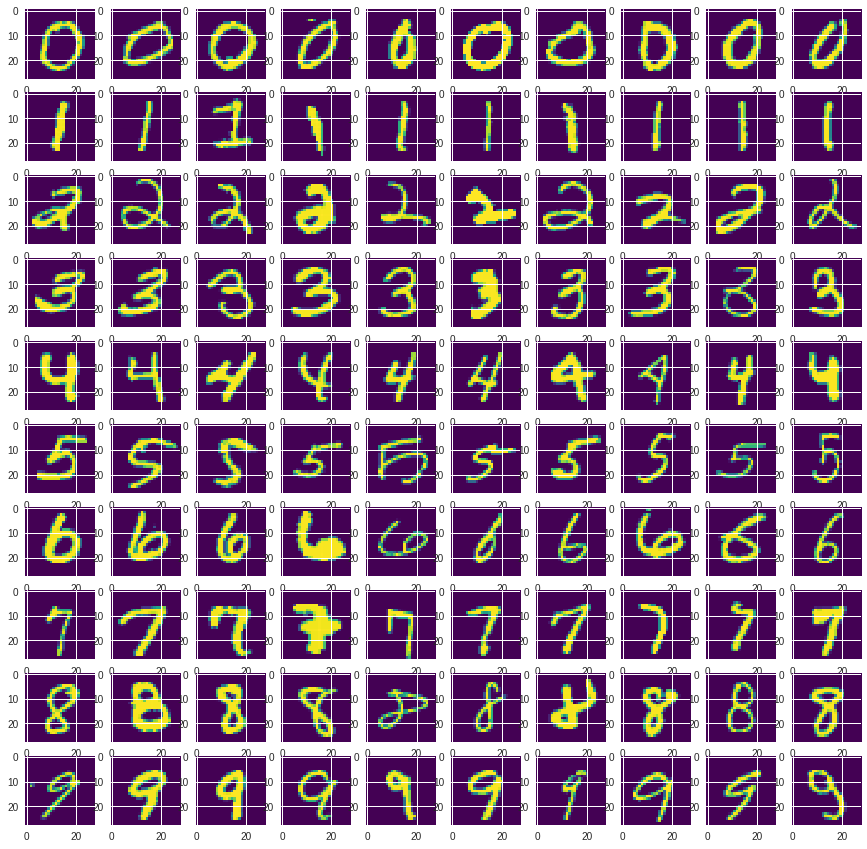

In [136]:
plot_img(x_batch,max_prob)

# Problem 4 Steps:

**1) Capture output of Last Layer**

**2) Choose 10 random dimensions out of 1024 dimensions**

**3) For each 10-d output vector, find the dim with the maximum probability**

**4) Plot the input image associated with that in a grid of subplots**
  

In [137]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
last_layer_pediction = sess.run(prediction_of_last_layer,feed_dict={X: x_batch})

(1000, 784)


In [0]:
'''Choose 10 random dimensions from 1024 dimensions'''
rand_dim = np.random.choice(1024, 10)
'''Define an array of size 1000X10'''
last_layer_output = np.zeros((last_layer_pediction.shape[0],10))

for j in range(last_layer_pediction.shape[0]):
  row_vector = [last_layer_pediction[j][i] for i in (rand_dim)]
  last_layer_output[j] = np.asarray(row_vector)
'''Calcuklate maximum probability'''
max_prob_last_layer = [np.argmax(last_layer_output[i]) for i in range(last_layer_output.shape[0])]
  

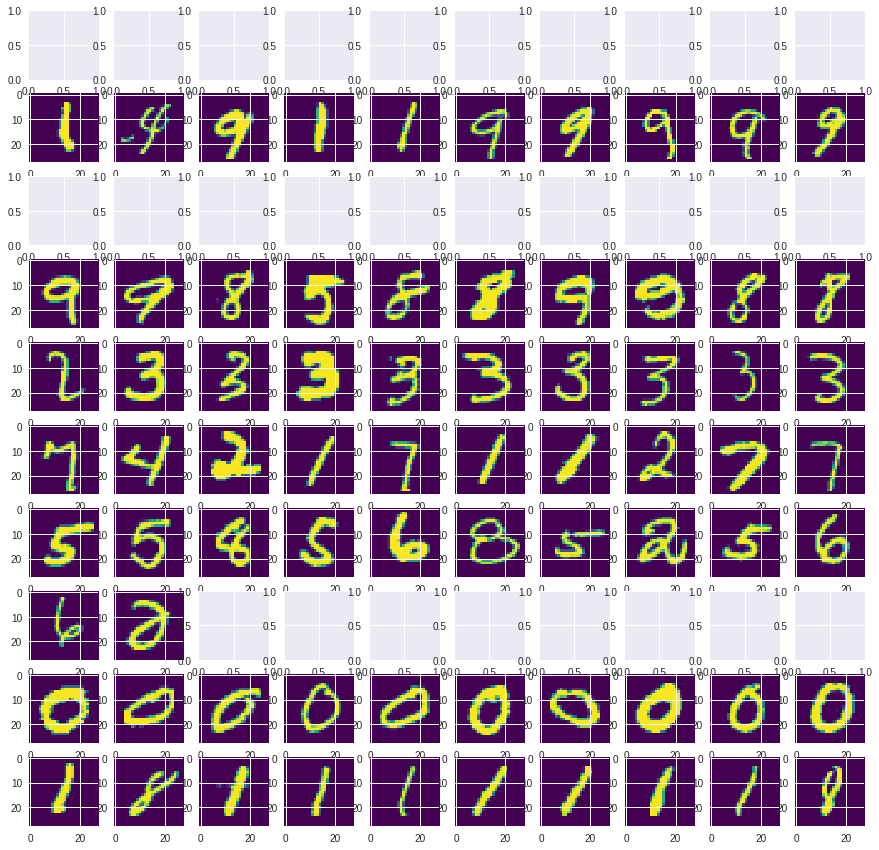

In [139]:
plot_img(x_batch,max_prob_last_layer)

# Problem 6

In [140]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
decoded_label = decode_labels(y_batch)

(1000, 784)


# Plot Scatter Plot on PCA and TSNE transformed data 

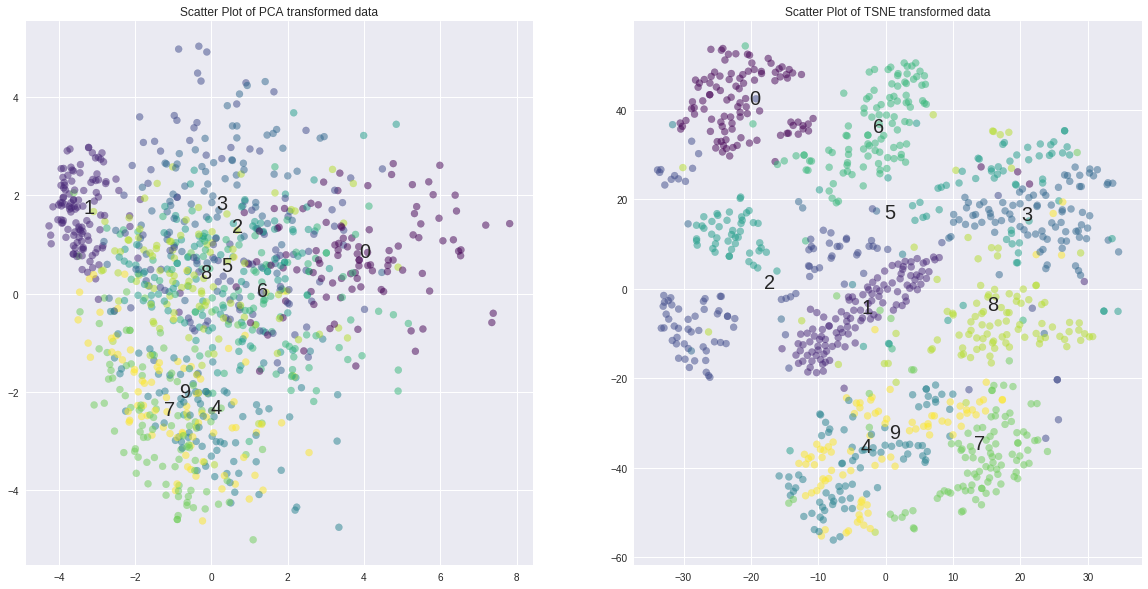

In [141]:
x_batch_pca , _ = reduce_dimension(x_batch,2)
pca_class_means = get_mean_of_class(x_batch_pca,decoded_label[:,0])
_, x_batch_tsne  = reduce_dimension(x_batch,2)
tsne_class_means = get_mean_of_class(x_batch_tsne,decoded_label)


fig, ax = plt.subplots(12,figsize=(20,10))
ax1 = plt.subplot(121)
ax1.scatter(x_batch_pca[:,0], x_batch_pca[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
class_marker = ['0','1','2','3','4','5','6','7','8','9','10']
for i,j in zip(class_marker,pca_class_means):
    ax1.text(j[0], j[1], i, fontsize=20)
ax1.set_title("Scatter Plot of PCA transformed data")


ax2 = plt.subplot(122)
ax2.scatter(x_batch_tsne[:,0], x_batch_tsne[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
class_marker = ['0','1','2','3','4','5','6','7','8','9','10']
for i,j in zip(class_marker,tsne_class_means):
    ax2.text(j[0], j[1], i, fontsize=20)
ax2.set_title("Scatter Plot of TSNE transformed data")


plt.show()

# Problem 7


In [0]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)

first_layer_pediction = sess.run(prediction_of_first_layer,feed_dict={X: x_batch})
second_layer_pediction = sess.run(prediction_of_second_layer,feed_dict={X: x_batch})
third_layer_pediction = sess.run(prediction_of_third_layer,feed_dict={X: x_batch})
fourth_layer_pediction = sess.run(prediction_of_last_layer,feed_dict={X: x_batch})
prediction_of_last_layer = sess.run(prediction,feed_dict={X: x_batch})
decoded_label = decode_labels(y_batch)

In [0]:
'''PCA and TSNE for Layer1'''
pca1 , _ = reduce_dimension(first_layer_pediction,2)
pca1_means = get_mean_of_class(pca1,decoded_label[:,0])
_, tsne1  = reduce_dimension(first_layer_pediction,2)
tsne1_means = get_mean_of_class(tsne1,decoded_label)

'''PCA and TSNE for Layer2'''

pca2 , _ = reduce_dimension(second_layer_pediction,2)
pca2_means = get_mean_of_class(pca2,decoded_label[:,0])
_, tsne2  = reduce_dimension(second_layer_pediction,2)
tsne2_means = get_mean_of_class(tsne2,decoded_label)


'''PCA and TSNE for Layer3'''

pca3 , _ = reduce_dimension(third_layer_pediction,2)
pca3_means = get_mean_of_class(pca3,decoded_label[:,0])
_, tsne3  = reduce_dimension(third_layer_pediction,2)
tsne3_means = get_mean_of_class(tsne3,decoded_label)

'''PCA and TSNE for Layer4'''

pca4 , _ = reduce_dimension(fourth_layer_pediction,2)
pca4_means = get_mean_of_class(pca4,decoded_label[:,0])
_, tsne4  = reduce_dimension(fourth_layer_pediction,2)
tsne4_means = get_mean_of_class(tsne4,decoded_label)

'''PCA and TSNE for Last Layer'''

pca5 , _ = reduce_dimension(prediction_of_last_layer,2)
pca5_means = get_mean_of_class(pca4,decoded_label[:,0])
_, tsne5  = reduce_dimension(prediction_of_last_layer,2)
tsne5_means = get_mean_of_class(tsne4,decoded_label)

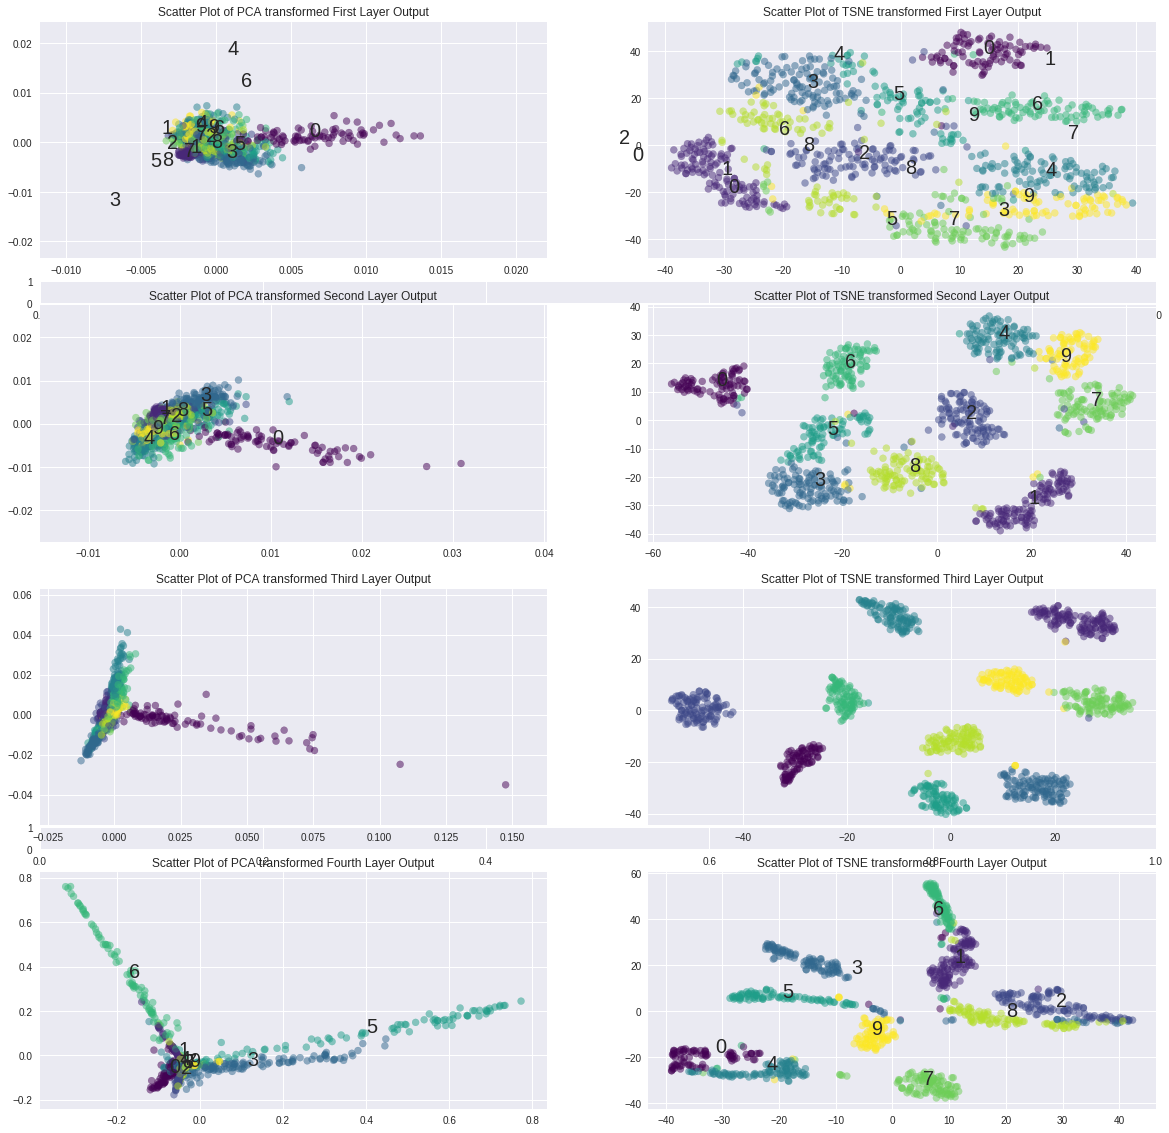

In [156]:
fig, ax = plt.subplots(42,figsize=(20,20))
class_marker = ['0','1','2','3','4','5','6','7','8','9','10']

ax1 = plt.subplot(421)
ax1.scatter(pca1[:,0], pca1[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca1_means):
    ax1.text(j[0], j[1], i, fontsize=20)
ax1.set_title("Scatter Plot of PCA transformed First Layer Output")


ax2 = plt.subplot(422)
ax2.scatter(tsne1[:,0], tsne1[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne1_means):
    ax2.text(j[0], j[1], i, fontsize=20)
ax2.set_title("Scatter Plot of TSNE transformed First Layer Output")

ax3 = plt.subplot(423)
ax3.scatter(pca2[:,0], pca2[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca2_means):
    ax3.text(j[0], j[1], i, fontsize=20)
ax3.set_title("Scatter Plot of PCA transformed Second Layer Output")


ax4 = plt.subplot(424)
ax4.scatter(tsne2[:,0], tsne2[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne2_means):
    ax4.text(j[0], j[1], i, fontsize=20)
ax4.set_title("Scatter Plot of TSNE transformed Second Layer Output")

ax5 = plt.subplot(425)
ax5.scatter(pca3[:,0], pca3[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca3_means):
    ax1.text(j[0], j[1], i, fontsize=20)
ax5.set_title("Scatter Plot of PCA transformed Third Layer Output")


ax6 = plt.subplot(426)
ax6.scatter(tsne3[:,0], tsne3[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne3_means):
    ax2.text(j[0], j[1], i, fontsize=20)
ax6.set_title("Scatter Plot of TSNE transformed Third Layer Output")

ax7 = plt.subplot(427)
ax7.scatter(pca4[:,0], pca4[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca4_means):
    ax7.text(j[0], j[1], i, fontsize=20)
ax7.set_title("Scatter Plot of PCA transformed Fourth Layer Output")


ax8 = plt.subplot(428)
ax8.scatter(tsne4[:,0], tsne4[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne4_means):
    ax8.text(j[0], j[1], i, fontsize=20)
ax8.set_title("Scatter Plot of TSNE transformed Fourth Layer Output")




plt.show()

Text(0.5, 1.0, 'Scatter Plot of TSNE transformed data of final prediction')

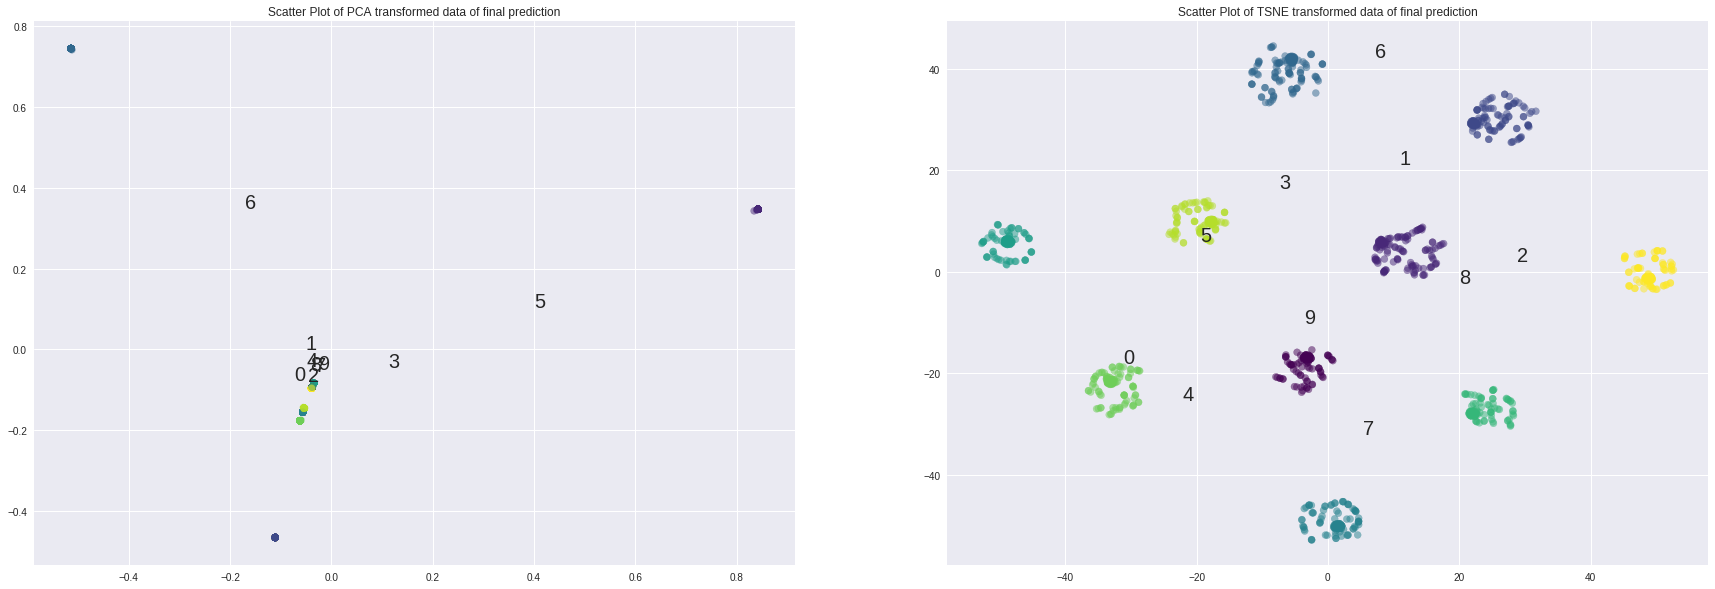

In [154]:
fig, ax = plt.subplots(12,figsize=(30,10))

ax1 = plt.subplot(121)
ax1.scatter(pca5[:,0], pca5[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)

for i,j in zip(class_marker,pca5_means):
    ax1.text(j[0], j[1], i, fontsize=20)
ax1.set_title("Scatter Plot of PCA transformed data of final prediction")


ax2 = plt.subplot(122)
ax2.scatter(tsne5[:,0], tsne5[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)

for i,j in zip(class_marker,tsne5_means):
    ax2.text(j[0], j[1], i, fontsize=20)
ax2.set_title("Scatter Plot of TSNE transformed data of final prediction")